<a href="https://colab.research.google.com/github/gilbertossoares/Estudo/blob/main/Loft%20School/Premier_League.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise da Premier League 2018/2019 ⚽🏆👑

Primeiramente agradecer a oportunidade do curso oferecido, à todos que puderam fazer isso se tornar póssivel, todos envolvidos.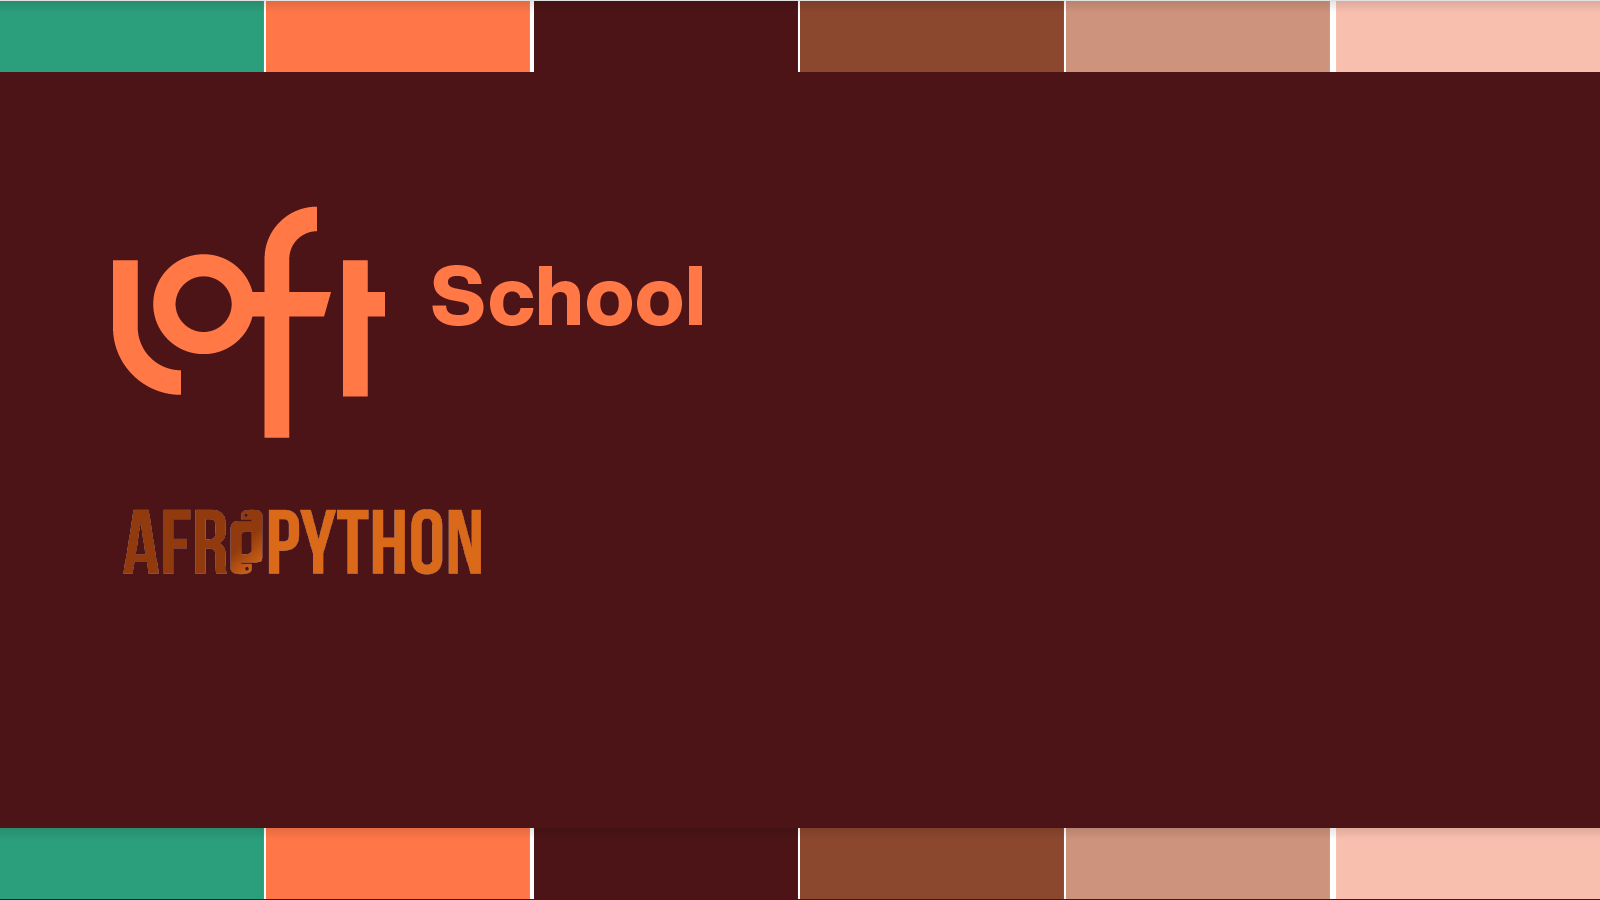

A Premier League é a principal liga de futebol da Inglaterra. É formada por 20 clubes e possui como tipo de competição liga com partidas de ida e volta. O time que ao longo das 38 rodadas obter o maior numero de pontos é consagrado campeão e os últimos 4 são rebaixados a EFL Championship que é a Segunda Divisão da Inglaterra.

O futebol nasceu na Inglaterra e hoje a liga mais cara do mundo em valor de mercado. De acordo com o [Transfermarkt](https://www.transfermarkt.com.br/premier-league/startseite/wettbewerb/GB1) atualmente tem o valor de 8,92 bilhões €. Para ter uma ideia de valor de mercado é aproximadamente 9 vezes maior que o valor da Série A do Campeonato Brasileiro. Em valor de mercado o time mais caro do Brasil que é o Flamengo (123,55 mi. €) só esta acima do West Bromwich Albion(106,55 mi. €). A temporada a ser analizada será a temporada 2018/2019.


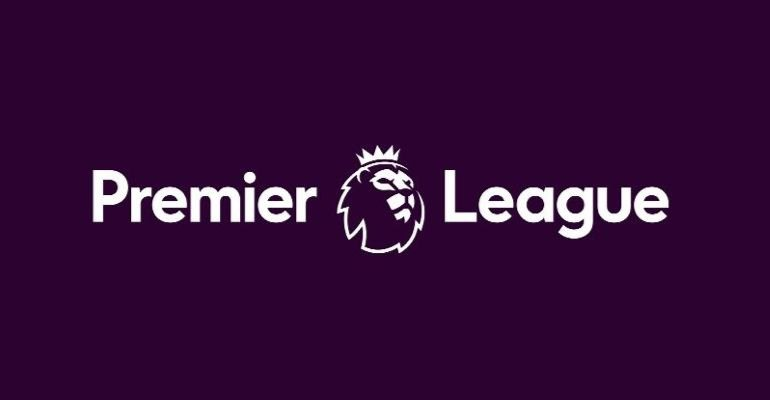

#Inicializando projeto

Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 60)

Para este projeto iremos usar os dados do [Footystats](https://footystats.org/download-stats-csv) para realizar esta análise. É um site pago com estatisticas das grandes ligas de futebol. Ele deixa de forma gratuita os dados da Permier League 2018/2019 com um 4 datasets: liga, times, partidas e jogadores. Vamos importar estes dados.

Importando dataset

In [ ]:
liga = pd.read_csv('england-premier-league-league-2018-to-2019-stats.csv')
partidas = pd.read_csv('england-premier-league-matches-2018-to-2019-stats.csv')
jogadores = pd.read_csv('england-premier-league-players-2018-to-2019-stats.csv')
times = pd.read_csv('england-premier-league-teams-2018-to-2019-stats.csv')

In [ ]:
liga

,name,season,status,format,number_of_clubs,total_matches,matches_completed,game_week,total_game_week,progress,average_goals_per_match,average_scored_home_team,average_scored_away_team,btts_percentage,clean_sheets_percentage,prediction_risk,home_scored_advantage_percentage,home_defence_advantage_percentage,home_advantage_percentage,average_corners_per_match,average_corners_per_match_home_team,average_corners_per_match_away_team,total_corners_for_season,average_cards_per_match,average_cards_per_match_home_team,average_cards_per_match_away_team,total_cards_for_season,over_05_percentage,over_15_percentage,over_25_percentage,over_35_percentage,over_45_percentage,over_55_percentage,under_05_percentage,under_15_percentage,under_25_percentage,under_35_percentage,under_45_percentage,under_55_percentage,over_65_corners_percentage,over_75_corners_percentage,over_85_corners_percentage,over_95_corners_percentage,over_105_corners_percentage,over_115_corners_percentage,over_125_corners_percentage,over_135_corners_percentage,over_05_cards_percentage,over_15_cards_percentage,over_25_cards_percentage,over_35_cards_percentage,over_45_cards_percentage,over_55_cards_percentage,over_65_cards_percentage,over_75_cards_percentage,goals_min_0_to_10,goals_min_11_to_20,goals_min_21_to_30,goals_min_31_to_40,goals_min_41_to_50,goals_min_51_to_60,goals_min_61_to_70,goals_min_71_to_80,goals_min_81_to_90,goals_min_0_to_15,goals_min_16_to_30,goals_min_31_to_45,goals_min_46_to_60,goals_min_61_to_75,goals_min_76_to_90
0,Premier League,2018/2019,Completed,NaN,20,380,380,38,38,100,2.82,1.57,1.25,51,54,73,26,20,23,10.28,5.73,4.56,3907,3.46,1.62,1.84,1315,94,80,54,32,14,6,6,20,46,68,86,94,88,81,70,59,47,35,27,16,93,86,67,44,28,16,8,3,82,116,108,98,118,112,133,119,186,134,172,170,158,185,253


O dataset "liga" possui informações gerais da liga como total de jogos, média de gols por partida, jogos por semana, progresso da liga, media de escanteios, cartões amarelos, etc.


Sumário

In [ ]:
print(liga.shape)
print(partidas.shape)
print(jogadores.shape)
print(times.shape)

(1, 70)
(380, 61)
(572, 46)
(20, 280)


#Explorando dados
##Dados por partida


In [ ]:
partidas.describe()

,timestamp,attendance,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no
count,3.800000e+02,0.0,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.0,380.000000,380.000000
mean,1.546145e+09,NaN,1.480895,1.167632,1.615500,1.198000,1.568421,1.252632,2.821053,1.252632,0.678947,0.573684,5.726316,4.555263,1.544737,0.047368,1.715789,0.076316,0.563158,1.028947,0.631579,1.160526,14.902632,11.913158,5.802632,4.878947,9.100000,7.034211,9.878947,9.944737,51.510526,48.489474,1.684053,1.385132,2.681553,50.350000,76.986842,53.431579,29.947368,13.078947,36.331579,69.007895,9.619500,3.354763,3.219421,4.471316,5.381816,1.257974,1.817684,3.095368,0.0,1.837053,1.904289
std,6.877351e+06,NaN,0.831446,0.761209,0.590587,0.534085,1.312836,1.180031,1.601312,1.143696,0.860802,0.766958,3.025632,2.731541,1.228766,0.212706,1.208267,0.275599,0.746998,1.023061,0.789812,1.054214,5.780368,4.717937,2.695740,2.329365,4.312405,3.640347,3.252128,3.417262,10.844665,10.844665,0.696330,0.572682,0.790425,19.281859,21.528709,19.770532,15.963757,10.812827,17.372090,20.733959,2.889728,1.169849,2.962683,1.906924,5.540953,0.125338,0.325979,0.847203,0.0,0.234274,0.248033
min,1.533928e+09,NaN,0.000000,0.000000,0.470000,0.260000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,23.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.070000,2.900000,1.120000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.540656e+09,NaN,1.000000,0.630000,1.210000,0.840000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,2.750000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,8.000000,4.000000,3.000000,6.000000,4.000000,8.000000,8.000000,43.000000,41.000000,1.302500,1.030000,2.460000,44.750000,72.750000,46.000000,22.000000,5.000000,27.000000,63.000000,8.887500,2.922500,1.570000,3.350000,2.300000,1.180000,1.585000,2.450000,0.0,1.690000,1.740000
50%,1.546018e+09,NaN,1.470000,1.075000,1.475000,1.160000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,14.000000,11.000000,6.000000,5.000000,9.000000,7.000000,10.000000,10.000000,52.000000,48.000000,1.650000,1.370000,2.785000,5

In [ ]:
partidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 61 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   timestamp                            380 non-null    int64  
 1   date_GMT                             380 non-null    object 
 2   status                               380 non-null    object 
 3   attendance                           0 non-null      float64
 4   home_team_name                       380 non-null    object 
 5   away_team_name                       380 non-null    object 
 6   referee                              380 non-null    object 
 7   Pre-Match PPG (Home)                 380 non-null    float64
 8   Pre-Match PPG (Away)                 380 non-null    float64
 9   home_ppg                             380 non-null    float64
 10  away_ppg                             380 non-null    float64
 11  home_team_goal_count            

Verificando colunas que possuem nulos

In [ ]:
import missingno as msno

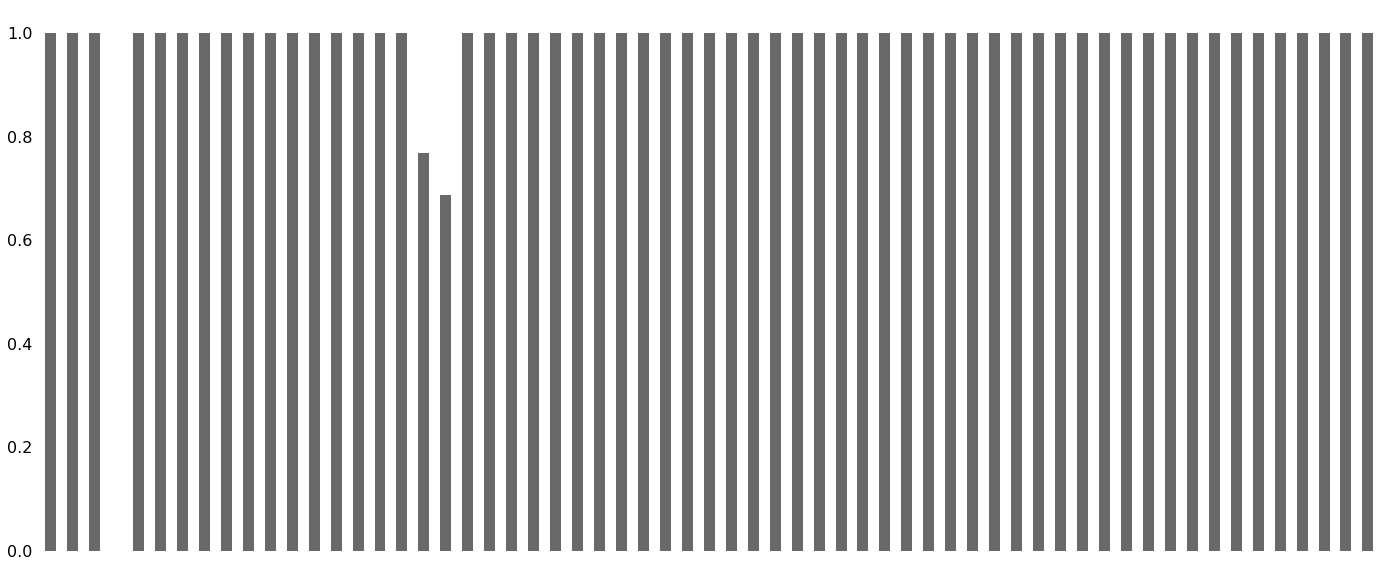

In [ ]:
msno.bar(partidas);

In [ ]:
partidas.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_goal_timings,away_team_goal_timings,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,1533927600,Aug 10 2018 - 7:00pm,complete,NaN,Manchester United,Leicester City,Andre Marriner,0.0,0.0,1.89,1.32,2,1,3,1,1,0,"3,83",90'2,2,5,2,0,1,0,0,2,0,1,9,14,7,5,2,9,11,7,44,56,1.31,1.84,0.0,0,0,0,0,0,0,0,0.0,0.0,1.37,4.98,9.81,1.33,2.00,3.60,0.0,2.05,1.69,Old Trafford (Manchester)
1,1533987000,Aug 11 2018 - 11:30am,complete,NaN,Newcastle United,Tottenham Hotspur,Martin Atkinson,0.0,0.0,1.32,1.74,1,2,3,3,1,2,11,"8,18",3,5,2,0,2,0,0,2,1,1,16,17,3,7,13,10,10,12,44,56,1.49,1.89,0.0,0,0,0,0,0,0,0,0.0,0.0,4.51,3.77,1.84,1.31,1.95,3.50,0.0,1.83,1.87,St. James' Park (Newcastle upon Tyne)
2,1533996000,Aug 11 2018 - 2:00pm,complete,NaN,AFC Bournemouth,Cardiff City,Kevin Friend,0.0,0.0,1.53,0.74,2,0,2,1,1,0,"24,90'1",NaN,7,4,1,0,1,0,1,0,1,0,9,11,4,2,5,9,11,7,62,38,1.31,1.14,0.0,0,0,0,0,0,0,0,0.0,0.0,2.03,3.51,3.96,1.31,1.95,3.45,0.0,1.83,1.83,Vitality Stadium (Bournemouth- Dorset)
3,1533996000,Aug 11 2018 - 2:00pm,complete,NaN,Fulham,Crystal Palace,Mike Dean,0.0,0.0,1.11,1.53,0,2,2,1,0,1,NaN,"41,79",5,5,1,0,2,0,1,0,1,1,12,12,7,10,5,2,9,11,60,40,1.73,1.80,0.0,0,0,0,0,0,0,0,0.0,0.0,2.31,3.44,3.26,1.28,1.87,3.20,0.0,1.71,2.00,Craven Cottage (London)
4,1533996000,Aug 11 2018 - 2:00pm,complete,NaN,Huddersfield Town,Chelsea,Chris Kavanagh,0.0,0.0,0.47,1.58,0,3,3,2,0,2,NaN,"34,45,80",2,5,2,0,1,0,1,1,0,1,8,12,3,5,5,7,8,8,40,60,1.09,1.42,0.0,0,0,0,0,0,0,0,0.0,0.0,7.47,4.27,1.51,1.29,1.91,3.30,0.0,2.00,1.71,John Smith's Stadium (Huddersfield- West Yorks...


Com ajuda do head() observamos que as colunas que possuem dados faltantes são: 


*   attendance - este dataset não possui os dados publico presente nas partidas. 
*   home_team_goal_timings - time da casa não fez gol, logo não tem como marcar quando o time fez gol.
*   away_team_goal_timings - mesmo caso do item anterior, porém o visitante não fez gol.



Listando times pela coluna de mandantes da partida:

In [ ]:
partidas['home_team_name'].unique()

array(['Manchester United', 'Newcastle United', 'AFC Bournemouth',
       'Fulham', 'Huddersfield Town', 'Watford',
       'Wolverhampton Wanderers', 'Liverpool', 'Southampton', 'Arsenal',
       'Cardiff City', 'Everton', 'Leicester City', 'Tottenham Hotspur',
       'West Ham United', 'Chelsea', 'Burnley', 'Manchester City',
       'Brighton & Hove Albion', 'Crystal Palace'], dtype=object)

Listando árbitros:

In [ ]:
partidas['referee'].unique()

array(['Andre Marriner', 'Martin Atkinson', 'Kevin Friend', 'Mike Dean',
       'Chris Kavanagh', 'Jonathan Moss', 'Craig Pawson',
       'Anthony Taylor', 'Graham Scott', 'Michael Oliver', 'Lee Mason',
       'Stuart Attwell', 'Paul Tierney', 'Lee Probert', 'David Coote',
       'Roger East', 'Simon Hooper', 'Andy Madley'], dtype=object)

##Gols 🥅

Máximo de gols feitos em uma partida por uma time visitante:

In [ ]:
partidas['away_team_goal_count'].max()

6

Máximo de gols feitos em uma partida por um time mandante:

In [ ]:
partidas['home_team_goal_count'].max()

6

Total de gols feitos pelos times em partidas como mandante:

In [ ]:
partidas.groupby('home_team_name')['home_team_goal_count'].sum()

home_team_name
AFC Bournemouth            30
Arsenal                    42
Brighton & Hove Albion     19
Burnley                    24
Cardiff City               21
Chelsea                    39
Crystal Palace             19
Everton                    30
Fulham                     22
Huddersfield Town          10
Leicester City             24
Liverpool                  55
Manchester City            57
Manchester United          33
Newcastle United           24
Southampton                27
Tottenham Hotspur          34
Watford                    26
West Ham United            32
Wolverhampton Wanderers    28
Name: home_team_goal_count, dtype: int64

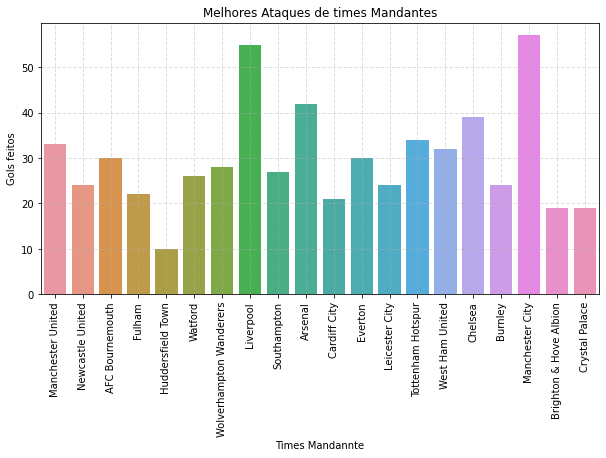

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='home_team_name',y='home_team_goal_count',data=partidas,estimator=sum, ci=None)
plt.grid(linestyle='--',linewidth=1,alpha=0.4)
plt.xticks(rotation=90)
plt.xlabel('Times Mandannte')
plt.ylabel('Gols feitos')
plt.title('Melhores Ataques de times Mandantes')
plt.show()

Total de gols feitos por time como visitante:

In [ ]:
partidas.groupby('away_team_name')['away_team_goal_count'].sum()

away_team_name
AFC Bournemouth            26
Arsenal                    31
Brighton & Hove Albion     16
Burnley                    21
Cardiff City               13
Chelsea                    24
Crystal Palace             32
Everton                    24
Fulham                     12
Huddersfield Town          12
Leicester City             27
Liverpool                  34
Manchester City            38
Manchester United          32
Newcastle United           18
Southampton                18
Tottenham Hotspur          33
Watford                    26
West Ham United            20
Wolverhampton Wanderers    19
Name: away_team_goal_count, dtype: int64

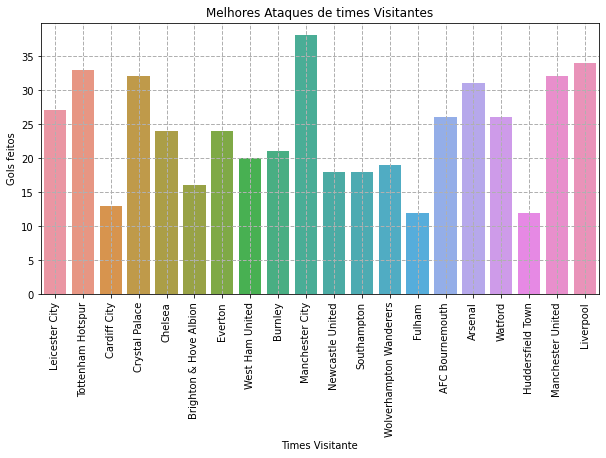

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='away_team_name',y='away_team_goal_count',data=partidas,estimator=sum, ci=None)
plt.grid(linestyle='--',linewidth=1)
plt.xticks(rotation=90)
plt.xlabel('Times Visitante')
plt.ylabel('Gols feitos')
plt.title('Melhores Ataques de times Visitantes')
plt.show()

Total de gols sofridos como mandante:

In [ ]:
partidas.groupby('home_team_name')['away_team_goal_count'].sum()

home_team_name
AFC Bournemouth            25
Arsenal                    16
Brighton & Hove Albion     28
Burnley                    32
Cardiff City               38
Chelsea                    12
Crystal Palace             23
Everton                    21
Fulham                     36
Huddersfield Town          31
Leicester City             20
Liverpool                  10
Manchester City            12
Manchester United          25
Newcastle United           25
Southampton                30
Tottenham Hotspur          16
Watford                    28
West Ham United            27
Wolverhampton Wanderers    21
Name: away_team_goal_count, dtype: int64

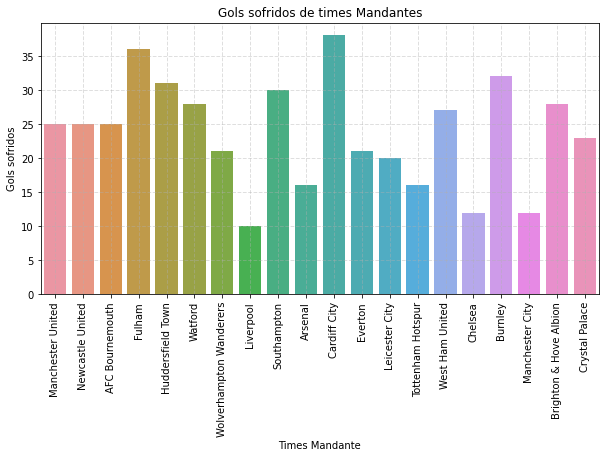

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='home_team_name',y='away_team_goal_count',data=partidas,estimator=sum, ci=None)
plt.grid(linestyle='--',linewidth=1,alpha=0.4)
plt.xticks(rotation=90)
plt.xlabel('Times Mandante')
plt.ylabel('Gols sofridos')
plt.title('Gols sofridos de times Mandantes')
plt.show()

Total de gols sofridos como visitante:

In [ ]:
partidas.groupby('away_team_name')['home_team_goal_count'].sum()

away_team_name
AFC Bournemouth            45
Arsenal                    35
Brighton & Hove Albion     32
Burnley                    36
Cardiff City               31
Chelsea                    27
Crystal Palace             30
Everton                    25
Fulham                     45
Huddersfield Town          45
Leicester City             28
Liverpool                  12
Manchester City            11
Manchester United          29
Newcastle United           23
Southampton                35
Tottenham Hotspur          23
Watford                    31
West Ham United            28
Wolverhampton Wanderers    25
Name: home_team_goal_count, dtype: int64

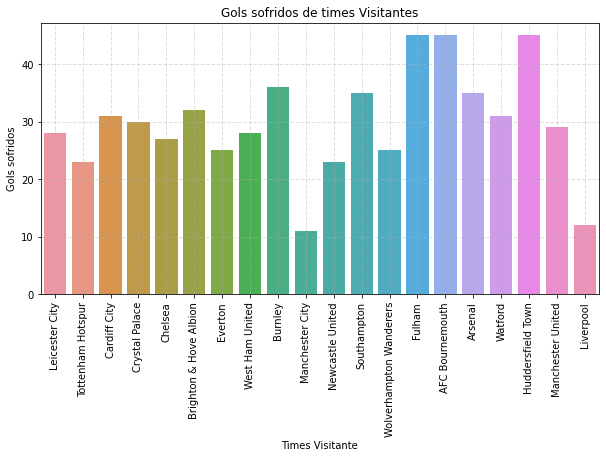

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='away_team_name',y='home_team_goal_count',data=partidas,estimator=sum, ci=None)
plt.grid(linestyle='--',linewidth=1,alpha=0.4)
plt.xticks(rotation=90)
plt.xlabel('Times Visitante')
plt.ylabel('Gols sofridos')
plt.title('Gols sofridos de times Visitantes')
plt.show()

Tabela de como terminou a temporada, para validação dos dados:

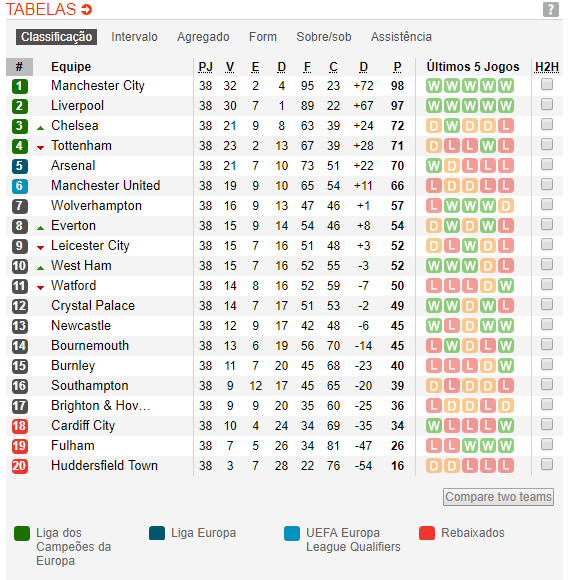

<Figure size 720x360 with 0 Axes>

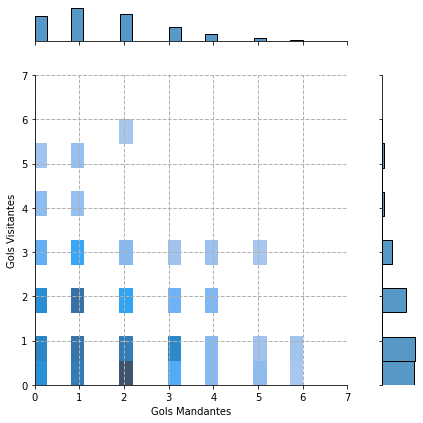

In [ ]:
plt.figure(figsize=(10,5))
plot = sns.jointplot(x='home_team_goal_count', y='away_team_goal_count', data=partidas,kind='hist', xlim=(0,7),ylim=(0,7),space=1).set_axis_labels('Gols Mandantes','Gols Visitantes')
plt.grid(linestyle='--',linewidth=1)
plot.ax_joint.tick_params(axis="both");

Validando com as partidas que tiveram mais de 6 gols, primeiro como visitante e dpeois como mandante.

In [ ]:
partidas.query('away_team_goal_count == 6')

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_goal_timings,away_team_goal_timings,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
179,1545580800,Dec 23 2018 - 4:00pm,complete,NaN,Everton,Tottenham Hotspur,Paul Tierney,2.0,2.4,1.79,1.74,2,6,8,4,1,3,"21,51","27,35,42,48,61,74",2,1,0,0,2,0,0,0,1,1,11,19,4,10,7,9,12,9,47,53,1.37,2.09,2.84,59,85,58,27,10,48,69,11.92,2.69,3.2,3.5,2.25,1.23,1.71,2.8,0.0,1.53,2.2,Goodison Park (Liverpool)


In [ ]:
partidas.query('home_team_goal_count == 6')

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_goal_timings,away_team_goal_timings,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
17,1534681800,Aug 19 2018 - 12:30pm,complete,NaN,Manchester City,Huddersfield Town,Andre Marriner,0.00,0.00,2.84,0.37,6,1,7,4,3,1,"25,31,35,48,75,84",43,10,3,0,0,2,0,0,0,0,2,33,6,15,2,18,4,9,3,68,32,3.79,0.71,0.00,0,0,0,0,0,0,0,0.00,0.00,1.09,9.99,9.99,1.09,1.34,1.87,0.0,2.80,1.38,Etihad Stadium (Manchester)
107,1541343600,Nov 04 2018 - 3:00pm,complete,NaN,Manchester City,Southampton,Lee Mason,3.00,0.80,2.84,0.84,6,1,7,5,4,1,"6,12,18,45'2,67,90'1",29,4,4,1,0,1,0,1,0,1,0,19,14,9,6,10,8,11,9,61,39,2.38,1.62,3.00,30,90,60,20,20,50,70,13.40,2.60,1.13,10.75,23.25,1.09,1.32,1.80,0.0,2.10,1.65,Etihad Stadium (Manchester)
259,1549814400,Feb 10 2019 - 4:00pm,complete,NaN,Manchester City,Chelsea,Mike Dean,2.77,1.83,2.84,1.58,6,0,6,4,4,0,"4,13,19,25,56,80",NaN,2,2,1,0,2,0,0,1,0,2,16,13,10,5,6,8,10,11,57,43,2.04,1.55,3.45,56,92,84,44,16,52,84,12.96,2.27,1.57,4.30,6.30,1.20,1.65,2.60,0.0,1.74,2.05,Etihad Stadium (Manchester)


A seguir exibimos demonstrativo sobre chutes necessários para fazer gols, como mandante e como visitante.

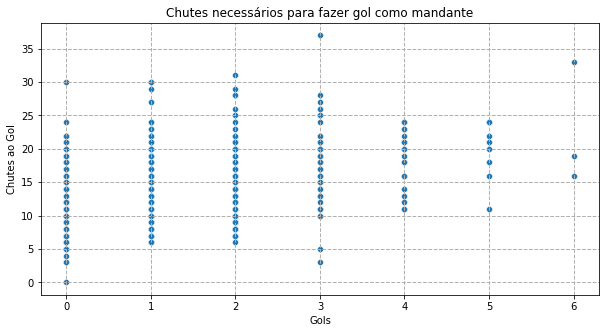

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='home_team_goal_count',y='home_team_shots',data=partidas,estimator=sum,ci=None)
plt.grid(linestyle='--',linewidth=1)
plt.xlabel('Gols')
plt.ylabel('Chutes ao Gol')
plt.title('Chutes necessários para fazer gol como mandante')
plt.show()

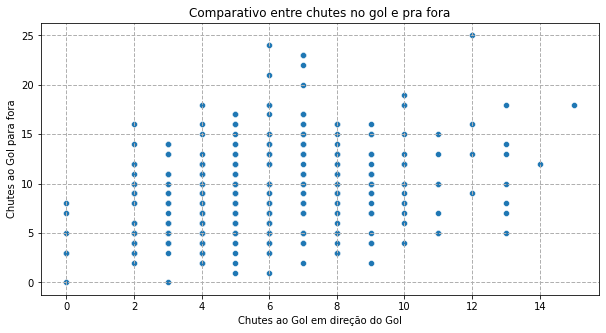

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='home_team_shots_on_target',y='home_team_shots_off_target',data=partidas,estimator=sum,ci=None)
plt.grid(linestyle='--',linewidth=1)
plt.xlabel('Chutes ao Gol em direção do Gol')
plt.ylabel('Chutes ao Gol para fora')
plt.title('Comparativo entre chutes no gol e pra fora')
plt.show()

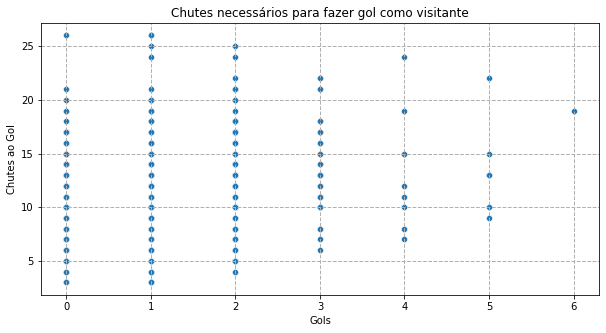

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='away_team_goal_count',y='away_team_shots',data=partidas,estimator=sum,ci=None)
plt.grid(linestyle='--',linewidth=1)
plt.xlabel('Gols')
plt.ylabel('Chutes ao Gol')
plt.title('Chutes necessários para fazer gol como visitante')
plt.show()

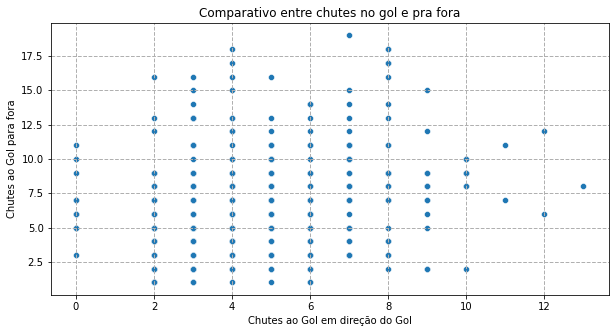

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='away_team_shots_on_target',y='away_team_shots_off_target',data=partidas,estimator=sum,ci=None)
plt.grid(linestyle='--',linewidth=1)
plt.xlabel('Chutes ao Gol em direção do Gol')
plt.ylabel('Chutes ao Gol para fora')
plt.title('Comparativo entre chutes no gol e pra fora')
plt.show()

##Quando ocorre a falta de Gols

Hoje para avaliarmos gols em uma partida não basta apenas comparar dados quantitativos entre chutes certos x errados, existe uma nova metrica criada que é a Expectativa de Gol(ou Gols esperados xG). No nosso dataset esta representado pela metrica team_a_xg e team_b_xg. Esta metrica é gerada por vários fatores: tipo de assistência, se a finalização foi de cabeça ou com o pé, o ângulo com relação ao gol, distância etc.

In [ ]:
chance_gol = partidas[['timestamp','date_GMT','home_team_name','away_team_name','home_team_goal_count','away_team_goal_count','team_a_xg','team_b_xg','home_team_shots','away_team_shots']]

In [ ]:
chance_gol.head()

,timestamp,date_GMT,home_team_name,away_team_name,home_team_goal_count,away_team_goal_count,team_a_xg,team_b_xg,home_team_shots,away_team_shots
0,1533927600,Aug 10 2018 - 7:00pm,Manchester United,Leicester City,2,1,1.31,1.84,9,14
1,1533987000,Aug 11 2018 - 11:30am,Newcastle United,Tottenham Hotspur,1,2,1.49,1.89,16,17
2,1533996000,Aug 11 2018 - 2:00pm,AFC Bournemouth,Cardiff City,2,0,1.31,1.14,9,11
3,1533996000,Aug 11 2018 - 2:00pm,Fulham,Crystal Palace,0,2,1.73,1.80,12,12
4,1533996000,Aug 11 2018 - 2:00pm,Huddersfield Town,Chelsea,0,3,1.09,1.42,8,12


In [ ]:
chance_gol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             380 non-null    int64  
 1   date_GMT              380 non-null    object 
 2   home_team_name        380 non-null    object 
 3   away_team_name        380 non-null    object 
 4   home_team_goal_count  380 non-null    int64  
 5   away_team_goal_count  380 non-null    int64  
 6   team_a_xg             380 non-null    float64
 7   team_b_xg             380 non-null    float64
 8   home_team_shots       380 non-null    int64  
 9   away_team_shots       380 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 29.8+ KB


In [ ]:
chance_gol.describe()

,timestamp,home_team_goal_count,away_team_goal_count,team_a_xg,team_b_xg,home_team_shots,away_team_shots
count,3.800000e+02,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.546145e+09,1.568421,1.252632,1.684053,1.385132,14.902632,11.913158
std,6.877351e+06,1.312836,1.180031,0.696330,0.572682,5.780368,4.717937
min,1.533928e+09,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,1.540656e+09,1.000000,0.000000,1.302500,1.030000,11.000000,8.000000
50%,1.546018e+09,1.000000,1.000000,1.650000,1.370000,14.000000,11.000000
75%,1.551541e+09,2.000000,2.000000,2.132500,1.752500,19.000000,15.000000
max,1.557670e+09,6.000000,6.000000,3.860000,2.880000,37.000000,26.000000


In [ ]:
chance_gol.query('home_team_goal_count == 0 and away_team_goal_count == 0')

,timestamp,date_GMT,home_team_name,away_team_name,home_team_goal_count,away_team_goal_count,team_a_xg,team_b_xg,home_team_shots,away_team_shots
8,1534077000,Aug 12 2018 - 12:30pm,Southampton,Burnley,0,0,1.85,1.82,19,15
10,1534591800,Aug 18 2018 - 11:30am,Cardiff City,Newcastle United,0,0,1.40,1.40,14,12
23,1535205600,Aug 25 2018 - 2:00pm,Huddersfield Town,Cardiff City,0,0,0.82,1.35,5,9
53,1537624800,Sep 22 2018 - 2:00pm,Crystal Palace,Newcastle United,0,0,1.82,0.94,16,7
58,1537705800,Sep 23 2018 - 12:30pm,West Ham United,Chelsea,0,0,0.79,2.34,7,19
79,1538926200,Oct 07 2018 - 3:30pm,Liverpool,Manchester City,0,0,1.06,0.97,8,7
81,1540044000,Oct 20 2018 - 2:00pm,AFC Bournemouth,Southampton,0,0,1.34,1.30,11,10
93,1540648800,Oct 27 2018 - 2:00pm,Southampton,Newcastle United,0,0,2.15,0.75,22,7
112,1541862000,Nov 10 2018 - 3:00pm,Leicester City,Burnley,0,0,2.31,0.88,21,8
117,1541945700,Nov 11 2018 - 2:15pm,Chelsea,Everton,0,0,1.68,0.73,15,7


Analisando as partidas com 0 a 0 pode ser observado algumas coisas. Partidas com poucos chutes a gol tem a estatistica de xg baixo geralmente, mas há casos que mesmo com alto xg e poucos chutes, chegamos a conclusão então que foram de partidas onde ocorreram grandes chances porém a defesa e o goleiro evitaram gols.

#Explorando os tipos de árbitros

In [ ]:
arbitros = partidas[['timestamp','date_GMT','home_team_name','away_team_name','referee','total_goal_count','home_team_yellow_cards','away_team_yellow_cards','home_team_red_cards','away_team_red_cards','home_team_fouls','away_team_fouls']].copy()

In [ ]:
arbitros.head()

,timestamp,date_GMT,home_team_name,away_team_name,referee,total_goal_count,home_team_yellow_cards,away_team_yellow_cards,home_team_red_cards,away_team_red_cards,home_team_fouls,away_team_fouls
0,1533927600,Aug 10 2018 - 7:00pm,Manchester United,Leicester City,Andre Marriner,3,2,1,0,0,11,7
1,1533987000,Aug 11 2018 - 11:30am,Newcastle United,Tottenham Hotspur,Martin Atkinson,3,2,2,0,0,10,12
2,1533996000,Aug 11 2018 - 2:00pm,AFC Bournemouth,Cardiff City,Kevin Friend,2,1,1,0,0,11,7
3,1533996000,Aug 11 2018 - 2:00pm,Fulham,Crystal Palace,Mike Dean,2,1,2,0,0,9,11
4,1533996000,Aug 11 2018 - 2:00pm,Huddersfield Town,Chelsea,Chris Kavanagh,3,2,1,0,0,8,8


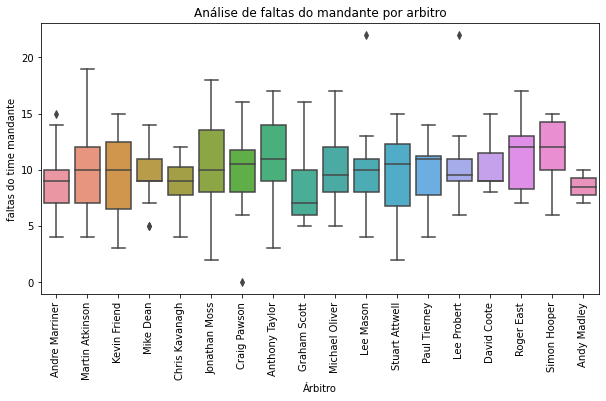

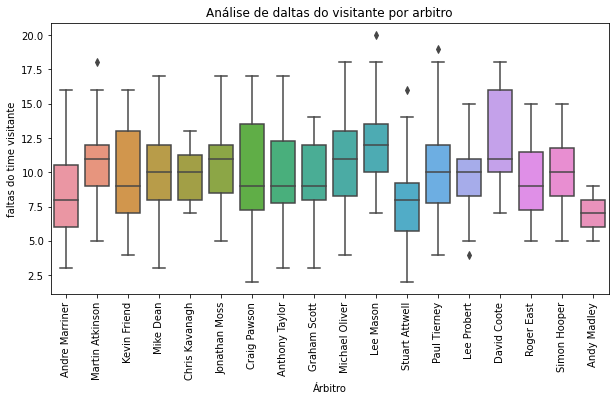

In [ ]:
plt.figure(figsize=(10,5))
faltas = sns.boxplot(x='referee', y='home_team_fouls', data=arbitros)
plt.xticks(rotation=90)
plt.xlabel('Árbitro')
plt.ylabel('faltas do time mandante')
plt.title('Análise de faltas do mandante por arbitro');

plt.figure(figsize=(10,5))
faltas = sns.boxplot(x='referee', y='away_team_fouls', data=arbitros)
plt.xticks(rotation=90)
plt.xlabel('Árbitro')
plt.ylabel('faltas do time visitante')
plt.title('Análise de daltas do visitante por arbitro');

Verificando os gráficos é possivel perceber um comportamento bem semelhante entre os árbitros em marcar faltas comparando times da casa e de fora. O único com comportamento bem diferente é o Stuart Attwell que marca mais faltas feitas pelos mandantes.

In [ ]:
arbitros['total_yellow_count'] = arbitros['home_team_yellow_cards']+arbitros['away_team_yellow_cards']

In [ ]:
arbitros['total_red_count'] = arbitros['home_team_red_cards']+arbitros['away_team_red_cards']

In [ ]:
arbitros.head()

,timestamp,date_GMT,home_team_name,away_team_name,referee,total_goal_count,home_team_yellow_cards,away_team_yellow_cards,home_team_red_cards,away_team_red_cards,home_team_fouls,away_team_fouls,total_yellow_count,total_red_count
0,1533927600,Aug 10 2018 - 7:00pm,Manchester United,Leicester City,Andre Marriner,3,2,1,0,0,11,7,3,0
1,1533987000,Aug 11 2018 - 11:30am,Newcastle United,Tottenham Hotspur,Martin Atkinson,3,2,2,0,0,10,12,4,0
2,1533996000,Aug 11 2018 - 2:00pm,AFC Bournemouth,Cardiff City,Kevin Friend,2,1,1,0,0,11,7,2,0
3,1533996000,Aug 11 2018 - 2:00pm,Fulham,Crystal Palace,Mike Dean,2,1,2,0,0,9,11,3,0
4,1533996000,Aug 11 2018 - 2:00pm,Huddersfield Town,Chelsea,Chris Kavanagh,3,2,1,0,0,8,8,3,0


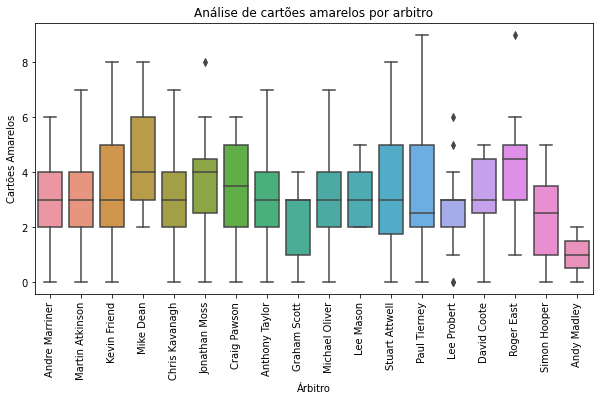

In [ ]:
plt.figure(figsize=(10,5))
yellow = sns.boxplot(x='referee', y='total_yellow_count', data=arbitros)
plt.xticks(rotation=90)
plt.xlabel('Árbitro')
plt.ylabel('Cartões Amarelos')
plt.title('Análise de cartões amarelos por arbitro');

É possível ver um certo padrão nos cartões amarelos, algo que segue o estilo da liga, proximo de 3 a média cartões, em alguns casos, alguns arbritos possuem valores diferentes, vamos validar se é causado pela quantidade de partidas:

In [ ]:
arbitros['referee'].value_counts()

Anthony Taylor     32
Michael Oliver     30
Mike Dean          29
Martin Atkinson    29
Kevin Friend       27
Jonathan Moss      27
Andre Marriner     27
Craig Pawson       26
Paul Tierney       24
Chris Kavanagh     24
Stuart Attwell     20
Lee Mason          19
Lee Probert        18
Graham Scott       17
David Coote        11
Roger East         10
Simon Hooper        8
Andy Madley         2
Name: referee, dtype: int64

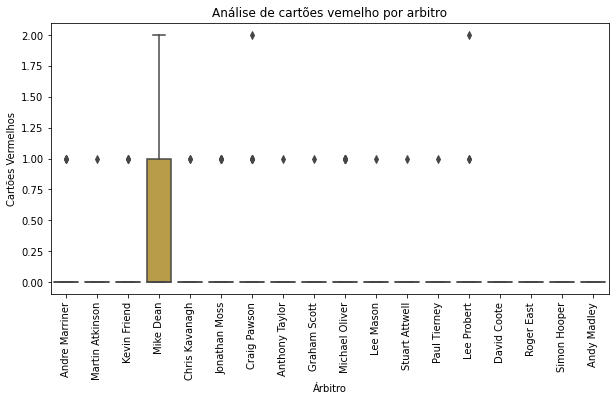

In [ ]:
plt.figure(figsize=(10,5))
yellow = sns.boxplot(x='referee', y='total_red_count', data=arbitros)
plt.xticks(rotation=90)
plt.xlabel('Árbitro')
plt.ylabel('Cartões Vermelhos')
plt.title('Análise de cartões vemelho por arbitro');

In [ ]:
arbitros[['referee','total_red_count']].query('referee=="Mike Dean" and total_red_count > 0')

,referee,total_red_count
12,Mike Dean,1
46,Mike Dean,1
74,Mike Dean,1
138,Mike Dean,1
158,Mike Dean,1
172,Mike Dean,1
183,Mike Dean,1
204,Mike Dean,2
315,Mike Dean,1


Mike Dean precisa segurar a mão nos Vermelhos.

#Informações sobre jogadores

##Explorando dados dos jogadores

In [ ]:
jogadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   full_name                       572 non-null    object 
 1   age                             572 non-null    int64  
 2   birthday                        572 non-null    int64  
 3   league                          572 non-null    object 
 4   season                          572 non-null    object 
 5   position                        572 non-null    object 
 6   Current Club                    572 non-null    object 
 7   minutes_played_overall          572 non-null    int64  
 8   minutes_played_home             572 non-null    int64  
 9   minutes_played_away             572 non-null    int64  
 10  nationality                     572 non-null    object 
 11  appearances_overall             572 non-null    int64  
 12  appearances_home                572 

Distribuição de jogadores por nacionalidade

In [ ]:
jogadores['nationality'].value_counts(normalize=True)*100

England                37.937063
Spain                   6.118881
France                  5.419580
Belgium                 3.496503
Republic of Ireland     3.496503
                         ...    
Benin                   0.174825
Iran                    0.174825
Slovenia                0.174825
Ecuador                 0.174825
Armenia                 0.174825
Name: nationality, Length: 67, dtype: float64

Distribuição de brasileiros pela Premiere League:

In [ ]:
jogadores[['Current Club','full_name','age','nationality']].query('nationality == "Brazil"').sort_values(by=['Current Club'])

,Current Club,full_name,age,nationality
83,Brighton & Hove Albion,Bernardo,25,Brazil
561,Chelsea,Willian,32,Brazil
148,Chelsea,David Luiz,33,Brazil
465,Everton,Richarlison de Andrade,23,Brazil
82,Everton,Bernard Anício Caldeira Duarte,28,Brazil
471,Liverpool,Roberto Firmino,28,Brazil
184,Liverpool,Fabinho,26,Brazil
36,Liverpool,Alisson Becker,27,Brazil
136,Manchester City,Danilo,29,Brazil
200,Manchester City,Gabriel Jesus,23,Brazil


Quantitativo de jogadores por posição:

In [ ]:
jogadores['position'].value_counts()

Midfielder    212
Defender      189
Forward       114
Goalkeeper     57
Name: position, dtype: int64

In [ ]:
jogadores.groupby('full_name')['minutes_played_overall'].sum()

full_name
Aaron Cresswell          1589
Aaron Lennon             1217
Aaron Mooy               2327
Aaron Ramsey             1327
Aaron Rowe                 69
                         ... 
Yves Bissouma            1769
Zechariah Medley            0
Zeze Steven Sessegnon       0
İlkay Gündoğan           2135
Łukasz Fabiański         3420
Name: minutes_played_overall, Length: 571, dtype: int64

In [ ]:
times.head()

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,wins_away,draws,draws_home,draws_away,losses,losses_home,losses_away,points_per_game,points_per_game_home,points_per_game_away,league_position,league_position_home,league_position_away,performance_rank,goals_scored,goals_conceded,goal_difference,total_goal_count,total_goal_count_home,total_goal_count_away,goals_scored_home,goals_scored_away,goals_conceded_home,goals_conceded_away,goal_difference_home,goal_difference_away,minutes_per_goal_scored,minutes_per_goal_scored_home,minutes_per_goal_scored_away,minutes_per_goal_conceded,...,leading_at_half_time_percentage_away,draw_at_half_time_percentage,draw_at_half_time_percentage_home,draw_at_half_time_percentage_away,losing_at_half_time_percentage,losing_at_half_time_percentage_home,losing_at_half_time_percentage_away,corners_per_match,corners_per_match_home,corners_per_match_away,cards_per_match,cards_per_match_home,cards_per_match_away,over65_corners_percentage,over75_corners_percentage,over85_corners_percentage,over95_corners_percentage,over105_corners_percentage,over115_corners_percentage,over125_corners_percentage,over135_corners_percentage,prediction_risk,goals_scored_min_0_to_10,goals_scored_min_11_to_20,goals_scored_min_21_to_30,goals_scored_min_31_to_40,goals_scored_min_41_to_50,goals_scored_min_51_to_60,goals_scored_min_61_to_70,goals_scored_min_71_to_80,goals_scored_min_81_to_90,goals_conceded_min_0_to_10,goals_conceded_min_11_to_20,goals_conceded_min_21_to_30,goals_conceded_min_31_to_40,goals_conceded_min_41_to_50,goals_conceded_min_51_to_60,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90
0,Arsenal FC,Arsenal,2018/2019,England,38,19,19,0,21,14,7,7,3,4,10,2,8,1.84,2.37,1.32,5,3,8,5,73,51,22,124,58,66,42,31,16,35,26,-4,47,41,55,67,...,16,45,37,53,26,21,32,5.50,6.58,4.42,2.00,2.11,1.89,87,82,71,63,47,34,28,13,87,6,9,8,2,8,10,10,7,13,3,7,5,5,9,1,12,1,8
1,Tottenham Hotspur FC,Tottenham Hotspur,2018/2019,England,38,19,19,0,23,12,11,2,2,0,13,5,8,1.87,2.00,1.74,4,5,3,4,67,39,28,106,50,56,34,33,16,23,18,10,51,50,52,87,...,53,29,26,32,21,26,16,5.11,5.37,4.84,1.63,1.11,2.16,87,76,63,50,47,32,28,16,89,6,4,11,5,7,8,8,8,10,3,4,1,2,1,6,4,8,10
2,Manchester City FC,Manchester City,2018/2019,England,38,19,19,0,32,18,14,2,0,2,4,1,3,2.58,2.84,2.32,1,1,1,1,95,23,72,118,69,49,57,38,12,11,45,27,36,30,45,148,...,63,29,26,32,5,5,5,7.84,8.11,7.58,1.21,0.89,1.53,79,79,66,57,50,32,28,18,92,12,13,8,9,13,12,12,6,10,0,2,3,3,3,3,4,2,3
3,Leicester City FC,Leicester City,2018/2019,England,38,19,19,0,15,8,7,7,3,4,16,8,8,1.37,1.42,1.32,9,11,7,9,51,48,3,99,44,55,24,27,20,28,4,-1,67,71,63,71,...,11,39,37,42,42,37,47,5.53,5.68,5.37,1.76,1.95,1.58,92,84,74,68,57,42,32,21,68,1,4,5,3,4,7,5,8,14,8,5,1,7,6,4,7,1,9
4,Crystal Palace FC,Crystal Palace,2018/2019,England,38,19,19,0,14,5,9,7,5,2,17,9,8,1.29,1.05,1.53,12,18,6,12,51,53,-2,104,42,62,19,32,23,30,-4,2,67,90,54,65,...,53,37,42,32,21,26,16,5.39,6.84,3.95,1.63,1.42,1.84,95,92,79,71,61,42,37,18,76,1,3,3,10,5,3,7,8,11,1,2,3,4,7,9,8,8,11


In [ ]:
times.columns

Index(['team_name', 'common_name', 'season', 'country', 'matches_played',
       'matches_played_home', 'matches_played_away', 'suspended_matches',
       'wins', 'wins_home',
       ...
       'goals_scored_min_81_to_90', 'goals_conceded_min_0_to_10',
       'goals_conceded_min_11_to_20', 'goals_conceded_min_21_to_30',
       'goals_conceded_min_31_to_40', 'goals_conceded_min_41_to_50',
       'goals_conceded_min_51_to_60', 'goals_conceded_min_61_to_70',
       'goals_conceded_min_71_to_80', 'goals_conceded_min_81_to_90'],
      dtype='object', length=280)

#Identificando padrões de jogo

In [ ]:
mandante = partidas[['date_GMT','home_team_name','home_team_goal_count','home_team_corner_count','home_team_yellow_cards','home_team_red_cards','home_team_shots','home_team_shots_on_target','home_team_fouls','home_team_possession','team_a_xg']].copy()

In [ ]:
visitante = partidas[['date_GMT','away_team_name','away_team_goal_count','away_team_corner_count','away_team_yellow_cards','away_team_red_cards','away_team_shots','away_team_shots_on_target','away_team_fouls','away_team_possession','team_b_xg']].copy()

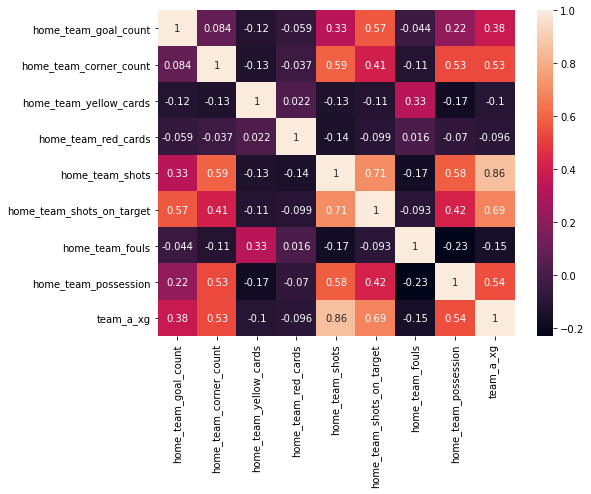

In [ ]:
corr_mandante = mandante.corr()
ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr_mandante,annot=True)
plt.show()

In [ ]:
corr_mandante.style.background_gradient(cmap='Blues')

,home_team_goal_count,home_team_corner_count,home_team_yellow_cards,home_team_red_cards,home_team_shots,home_team_shots_on_target,home_team_fouls,home_team_possession,team_a_xg
home_team_goal_count,1.000000,0.084437,-0.115578,-0.058880,0.328580,0.570811,-0.043786,0.218633,0.375833
home_team_corner_count,0.084437,1.000000,-0.133670,-0.037201,0.593334,0.407109,-0.114390,0.532586,0.532130
home_team_yellow_cards,-0.115578,-0.133670,1.000000,0.022156,-0.132932,-0.112429,0.330175,-0.173983,-0.101883
home_team_red_cards,-0.058880,-0.037201,0.022156,1.000000,-0.142166,-0.098691,0.015940,-0.069991,-0.095893
home_team_shots,0.328580,0.593334,-0.132932,-0.142166,1.000000,0.708584,-0.170602,0.583839,0.856877
home_team_shots_on_target,0.570811,0.407109,-0.112429,-0.098691,0.708584,1.000000,-0.092721,0.422415,0.687255
home_team_fouls,-0.043786,-0.114390,0.330175,0.015940,-0.170602,-0.092721,1.000000,-0.231435,-0.152043
home_team_possession,0.218633,0.532586,-0.173983,-0.069991,0.583839,0.422415,-0.231435,1.000000,0.543844
team_a_xg,0.375833,0.532130,-0.101883,-0.095893,0.856877,0.687255,-0.152043,0.543844,1.000000


In [ ]:
corr_visitante = visitante.corr()

In [ ]:
corr_visitante.style.background_gradient(cmap='Blues')

,away_team_goal_count,away_team_corner_count,away_team_yellow_cards,away_team_red_cards,away_team_shots,away_team_shots_on_target,away_team_fouls,away_team_possession,team_b_xg
away_team_goal_count,1.000000,0.035768,0.026434,-0.051326,0.257504,0.506468,-0.022047,0.219999,0.235698
away_team_corner_count,0.035768,1.000000,-0.099956,-0.045923,0.541192,0.289673,-0.067936,0.531908,0.491889
away_team_yellow_cards,0.026434,-0.099956,1.000000,0.097001,-0.035815,-0.058193,0.323368,-0.092252,-0.053559
away_team_red_cards,-0.051326,-0.045923,0.097001,1.000000,-0.053737,0.039089,0.057720,-0.059320,-0.031576
away_team_shots,0.257504,0.541192,-0.035815,-0.053737,1.000000,0.656643,-0.053159,0.562682,0.893719
away_team_shots_on_target,0.506468,0.289673,-0.058193,0.039089,0.656643,1.000000,-0.022057,0.329384,0.668966
away_team_fouls,-0.022047,-0.067936,0.323368,0.057720,-0.053159,-0.022057,1.000000,-0.138104,-0.076853
away_team_possession,0.219999,0.531908,-0.092252,-0.059320,0.562682,0.329384,-0.138104,1.000000,0.529827
team_b_xg,0.235698,0.491889,-0.053559,-0.031576,0.893719,0.668966,-0.076853,0.529827,1.000000


É percepitível não só a relação de estatisticas de chute a gol, gol, xg como a de posse de bola e numero de escanteios. Quem possui mais posse de bola tenta mais com mais chutes e obtem maior numero de escanteios

#Explorando mais os ataques

Inspiração: https://globoesporte.globo.com/rj/futebol/brasileirao-serie-a/noticia/compare-desempenhos-ofensivos-e-defensivos-da-serie-a-e-descubra-o-potencial-do-seu-time-no-returno.ghtml

In [ ]:
ataque_casa = mandante.groupby('home_team_name', as_index=False).agg(avg_shots=('home_team_shots','mean'),
                                                                avg_xg=('team_a_xg','mean'))

In [ ]:
ataque_casa

,home_team_name,avg_shots,avg_xg
0,AFC Bournemouth,12.736842,1.505789
1,Arsenal,14.684211,1.843684
2,Brighton & Hove Albion,11.473684,1.237368
3,Burnley,12.157895,1.447368
4,Cardiff City,13.263158,1.441053
5,Chelsea,18.315789,2.165263
6,Crystal Palace,16.736842,1.834211
7,Everton,15.684211,1.822632
8,Fulham,14.842105,1.664737
9,Huddersfield Town,11.631579,1.397895


In [ ]:
ataque_fora = visitante.groupby('away_team_name', as_index=False).agg(avg_shots=('away_team_shots','mean'),
                                                                avg_xg=('team_b_xg','mean'))

In [ ]:
ataque_fora

,away_team_name,avg_shots,avg_xg
0,AFC Bournemouth,12.842105,1.561579
1,Arsenal,12.052632,1.463158
2,Brighton & Hove Albion,9.578947,1.025263
3,Burnley,8.789474,1.097368
4,Cardiff City,10.210526,1.167368
5,Chelsea,15.578947,1.818421
6,Crystal Palace,11.473684,1.361579
7,Everton,12.210526,1.512105
8,Fulham,10.105263,1.204211
9,Huddersfield Town,11.315789,1.315263


In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
configure_plotly_browser_state()

trace = go.Scatter(x = ataque_casa['avg_shots'],
                   y = ataque_casa['avg_xg'],
                   mode = 'markers',
                   text = 'Time:'+ ataque_casa['home_team_name'],
                   hoverinfo = ['text+x+y'],
                   )

data = [trace]

py.iplot(data)

In [ ]:
configure_plotly_browser_state()

trace = go.Scatter(x = ataque_fora['avg_shots'],
                   y = ataque_fora['avg_xg'],
                   mode = 'markers',
                   text = 'Time:'+ ataque_fora['away_team_name'],
                   hoverinfo = ['text+x+y'],
                   )
data = [trace]
py.iplot(data)

Na Premier League é notável grupos na qual times precisam de menos chutes para ter uma espectativa de gol maior, quanto mais a direita maior a média de chutes por partida e quanto mais ao alto do deixo y maior é qualidade de chute.

In [ ]:
defesa_casa = partidas.groupby('home_team_name', as_index=False).agg(avg_shots=('away_team_shots','mean'),
                                                                avg_xg=('team_b_xg','mean'))

In [ ]:
defesa_fora = partidas.groupby('away_team_name', as_index=False).agg(avg_shots=('home_team_shots','mean'),
                                                                avg_xg=('team_a_xg','mean'))

In [ ]:
configure_plotly_browser_state()

trace = go.Scatter(x = defesa_casa['avg_shots'],
                   y = defesa_casa['avg_xg'],
                   mode = 'markers',
                   text = 'Time:'+ defesa_casa['home_team_name'],
                   hoverinfo = ['text+x+y'],
                   )
data = [trace]

layout = go.Layout(title = '')
py.iplot(data)

In [ ]:
configure_plotly_browser_state()

trace = go.Scatter(x = defesa_fora['avg_shots'],
                   y = defesa_fora['avg_xg'],
                   mode = 'markers',
                   text = 'Time:'+ defesa_fora['away_team_name'],
                   hoverinfo = ['text+x+y'],
                   )
data = [trace]
py.iplot(data)

No caso das defesas existem defesas que tem a espectativa de sofrer gols com mais chutes do que outras equipes, é o caso do Manchester United comparado ao Liverpool. Este comportamento ocorre tanto em jogos em casa como em jogos fora.

#Projetos Futuros


*   Realizar modelagem para classificação de estilos de jogos.
*   Enriquecer análise com dados de clima para validar se existe mudança no estilo de jogo.





In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)

In [ ]:
ataque_avv = mandante.groupby('home_team_name', as_index=False).agg(avg_shots=('home_team_shots','mean'),
                                                                avg_xg=('team_a_xg','mean'),
                                                                avg_posse=('home_team_possession','mean'),
                                                                avg_falta=('home_team_fouls','mean'))

In [ ]:
ataque_avv.head()

,home_team_name,avg_shots,avg_xg,avg_posse,avg_falta
0,AFC Bournemouth,12.736842,1.505789,46.684211,9.315789
1,Arsenal,14.684211,1.843684,58.473684,11.105263
2,Brighton & Hove Albion,11.473684,1.237368,46.052632,11.052632
3,Burnley,12.157895,1.447368,46.315789,9.473684
4,Cardiff City,13.263158,1.441053,41.631579,10.315789


In [ ]:
x = scaler.fit_transform(ataque_avv[['avg_shots','avg_xg','avg_posse','avg_falta']])

In [ ]:
x

array([[-0.91584132, -0.58922661, -0.7713673 , -0.48960638],
       [-0.0923631 ,  0.52764226,  1.11288869,  1.06615222],
       [-1.44998936, -1.4764589 , -0.87230958,  1.02039461],
       [-1.16065917, -0.78233011, -0.83025029, -0.35233357],
       [-0.69327964, -0.80320616, -1.57890558,  0.37978813],
       [ 1.44331251,  1.59058132,  1.18859541, -1.63354653],
       [ 0.77562746,  0.49632818, -0.19094916, -0.39809117],
       [ 0.3305041 ,  0.45805541,  0.50723498,  1.20342504],
       [-0.02559459, -0.06384593, -0.70407244,  0.28827292],
       [-1.38322085, -0.9458592 , -0.27506773,  0.79160658],
       [ 0.77562746,  0.76423753,  0.0529947 , -0.44384878],
       [ 1.59910568,  1.79412285,  1.62601198, -1.77081935],
       [ 2.17776605,  1.92807752,  2.32419611, -1.54203132],
       [-0.76004814, -1.83135181,  0.30535041,  1.02039461],
       [-0.07010693, -0.7771111 , -0.56948272,  0.33403052],
       [-0.29266861, -0.16648653, -0.97325187,  1.29494025],
       [ 0.97593297,  0.

In [ ]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
ataque_avv['cluster'] = kmeans.labels_

In [ ]:
ataque_avv.head()

,home_team_name,avg_shots,avg_xg,avg_posse,avg_falta,cluster,pca_1,pca_2,color
0,AFC Bournemouth,12.736842,1.505789,46.684211,9.315789,2,-5.175521,0.123649,green
1,Arsenal,14.684211,1.843684,58.473684,11.105263,4,6.432079,2.846634,blue
2,Brighton & Hove Albion,11.473684,1.237368,46.052632,11.052632,1,-6.328726,1.742614,green
3,Burnley,12.157895,1.447368,46.315789,9.473684,2,-5.714433,0.572077,green
4,Cardiff City,13.263158,1.441053,41.631579,10.315789,2,-9.916153,-1.480868,red


In [ ]:
ataque_avv

,home_team_name,avg_shots,avg_xg,avg_posse,avg_falta,cluster,pca_1,pca_2,color
0,AFC Bournemouth,12.736842,1.505789,46.684211,9.315789,2,-5.175521,0.123649,green
1,Arsenal,14.684211,1.843684,58.473684,11.105263,4,6.432079,2.846634,blue
2,Brighton & Hove Albion,11.473684,1.237368,46.052632,11.052632,1,-6.328726,1.742614,green
3,Burnley,12.157895,1.447368,46.315789,9.473684,2,-5.714433,0.572077,green
4,Cardiff City,13.263158,1.441053,41.631579,10.315789,2,-9.916153,-1.480868,red
5,Chelsea,18.315789,2.165263,58.947368,8.000000,0,8.272811,-1.406286,blue
6,Crystal Palace,16.736842,1.834211,50.315789,9.421053,3,-0.540388,-2.136135,orange
7,Everton,15.684211,1.822632,54.684211,11.263158,4,3.114758,0.881510,orange
8,Fulham,14.842105,1.664737,47.105263,10.210526,2,-4.233161,-1.182966,green
9,Huddersfield Town,11.631579,1.397895,49.789474,10.789474,1,-2.702773,2.649504,green


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
x_pca = pca.fit_transform(x)

In [ ]:
x_pca

array([[-0.96052675, -0.98421821],
       [ 0.29724033,  1.51910698],
       [-2.4357759 ,  0.07051558],
       [-1.28365081, -0.94992521],
       [-1.73074603, -0.66545599],
       [ 2.91744577, -0.41193993],
       [ 0.7633683 , -0.28486854],
       [ 0.1330584 ,  1.36538643],
       [-0.51607976, -0.12941878],
       [-1.7277393 ,  0.25349219],
       [ 1.04401312, -0.16732786],
       [ 3.38159799, -0.26102972],
       [ 3.99960092,  0.37400383],
       [-1.68438627,  0.71638837],
       [-0.87394235, -0.10875857],
       [-1.28989473,  0.53654678],
       [ 1.82044138,  0.10362284],
       [-1.457047  ,  0.64221107],
       [ 0.01831822, -1.26203507],
       [-0.41529554, -0.35629617]])

In [ ]:
ataque_avv[['pca_1','pca_2']] = x_pca

In [ ]:
ataque_avv.head()

,home_team_name,avg_shots,avg_xg,avg_posse,avg_falta,cluster,pca_1,pca_2,color
0,AFC Bournemouth,12.736842,1.505789,46.684211,9.315789,2,-0.960527,-0.984218,green
1,Arsenal,14.684211,1.843684,58.473684,11.105263,4,0.297240,1.519107,blue
2,Brighton & Hove Albion,11.473684,1.237368,46.052632,11.052632,1,-2.435776,0.070516,green
3,Burnley,12.157895,1.447368,46.315789,9.473684,2,-1.283651,-0.949925,green
4,Cardiff City,13.263158,1.441053,41.631579,10.315789,2,-1.730746,-0.665456,red


In [ ]:
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange', 4: 'yellow'}

ataque_avv['color'] = ataque_avv['cluster'].apply(lambda x: color_dict[x])

In [ ]:
configure_plotly_browser_state()

trace = go.Scatter(x = ataque_avv['pca_1'],
                   y = ataque_avv['pca_2'],
                   mode = 'markers',
                   marker_color=ataque_avv['color'],
                   text = 'Time:'+ ataque_avv['home_team_name'],
                   hoverinfo = ['text+x+y'],
                   )
data = [trace]
py.iplot(data)

In [ ]:
x

array([[-0.91584132, -0.58922661, -0.7713673 , -0.48960638],
       [-0.0923631 ,  0.52764226,  1.11288869,  1.06615222],
       [-1.44998936, -1.4764589 , -0.87230958,  1.02039461],
       [-1.16065917, -0.78233011, -0.83025029, -0.35233357],
       [-0.69327964, -0.80320616, -1.57890558,  0.37978813],
       [ 1.44331251,  1.59058132,  1.18859541, -1.63354653],
       [ 0.77562746,  0.49632818, -0.19094916, -0.39809117],
       [ 0.3305041 ,  0.45805541,  0.50723498,  1.20342504],
       [-0.02559459, -0.06384593, -0.70407244,  0.28827292],
       [-1.38322085, -0.9458592 , -0.27506773,  0.79160658],
       [ 0.77562746,  0.76423753,  0.0529947 , -0.44384878],
       [ 1.59910568,  1.79412285,  1.62601198, -1.77081935],
       [ 2.17776605,  1.92807752,  2.32419611, -1.54203132],
       [-0.76004814, -1.83135181,  0.30535041,  1.02039461],
       [-0.07010693, -0.7771111 , -0.56948272,  0.33403052],
       [-0.29266861, -0.16648653, -0.97325187,  1.29494025],
       [ 0.97593297,  0.

In [ ]:
ataque_avv.columns

Index(['home_team_name', 'avg_shots', 'avg_xg', 'avg_posse', 'avg_falta',
       'cluster', 'pca_1', 'pca_2', 'color'],
      dtype='object')

In [ ]:
ataque_avv.groupby('cluster')[['avg_shots', 'avg_xg', 'avg_posse', 'avg_falta']].mean()

,avg_shots,avg_xg,avg_posse,avg_falta
cluster,,,,
0,19.017544,2.219825,62.228070,7.982456
1,12.652632,1.395474,48.589474,11.115789
2,13.812030,1.537895,46.563910,9.714286
3,16.894737,1.870877,53.824561,9.228070
4,15.184211,1.833158,56.578947,11.184211


In [ ]:
ataque_avv

,home_team_name,avg_shots,avg_xg,avg_posse,avg_falta,cluster,pca_1,pca_2,color
0,AFC Bournemouth,12.736842,1.505789,46.684211,9.315789,2,-0.960527,-0.984218,green
1,Arsenal,14.684211,1.843684,58.473684,11.105263,4,0.297240,1.519107,yellow
2,Brighton & Hove Albion,11.473684,1.237368,46.052632,11.052632,1,-2.435776,0.070516,blue
3,Burnley,12.157895,1.447368,46.315789,9.473684,2,-1.283651,-0.949925,green
4,Cardiff City,13.263158,1.441053,41.631579,10.315789,2,-1.730746,-0.665456,green
5,Chelsea,18.315789,2.165263,58.947368,8.000000,0,2.917446,-0.411940,red
6,Crystal Palace,16.736842,1.834211,50.315789,9.421053,3,0.763368,-0.284869,orange
7,Everton,15.684211,1.822632,54.684211,11.263158,4,0.133058,1.365386,yellow
8,Fulham,14.842105,1.664737,47.105263,10.210526,2,-0.516080,-0.129419,green
9,Huddersfield Town,11.631579,1.397895,49.789474,10.789474,1,-1.727739,0.253492,blue
